In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('data/test.csv')

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [7]:
y = train_data['Survived']

In [8]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Ticket", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [9]:
X.head()

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,26.0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,0,35.0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

/home/missPanda/repos/devenv3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
X.columns

Index(['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex_female', 'Sex_male',
       'Ticket_110152', 'Ticket_110413', 'Ticket_110465',
       ...
       'Ticket_W./C. 14263', 'Ticket_W./C. 6607', 'Ticket_W./C. 6608',
       'Ticket_W./C. 6609', 'Ticket_W.E.P. 5734', 'Ticket_W/C 14208',
       'Ticket_WE/P 5735', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=691)

In [16]:
X.Sex_female.sum()

314

In [21]:
import matplotlib.pyplot as plot
%matplotlib inline

In [27]:
X.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
train_data.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [17]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
bins = pd.cut(train_data.Age, bins=[0,5,10,20,30, 40, 50, 60, 90])

In [22]:
%matplorlib inline

UsageError: Line magic function `%matplorlib` not found.


In [21]:
bins.value_counts().plot()

Survived  Sex   
0         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
1         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

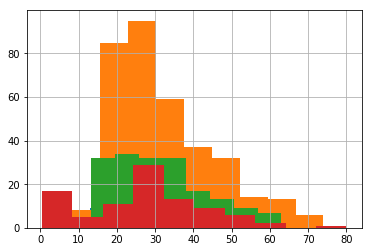

In [45]:
train_data.groupby(['Survived', 'Sex'])['Age'].hist()

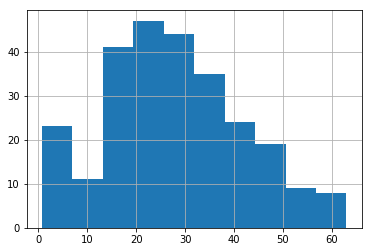

In [28]:
X[X['Sex_female'] == 1].Age.hist()

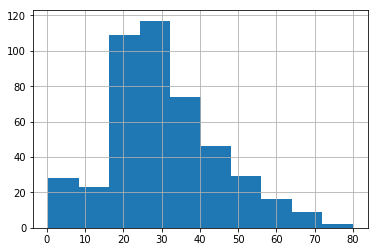

In [29]:
X[X['Sex_female'] == 0].Age.hist()

In [17]:
X.Sex_male.sum()

577

In [14]:
X.shape

(891, 691)

In [11]:
X.isnull().sum()

Pclass                        0
SibSp                         0
Parch                         0
Age                         177
Fare                          0
Sex_female                    0
Sex_male                      0
Ticket_110152                 0
Ticket_110413                 0
Ticket_110465                 0
Ticket_110564                 0
Ticket_110813                 0
Ticket_111240                 0
Ticket_111320                 0
Ticket_111361                 0
Ticket_111369                 0
Ticket_111426                 0
Ticket_111427                 0
Ticket_111428                 0
Ticket_112050                 0
Ticket_112052                 0
Ticket_112053                 0
Ticket_112058                 0
Ticket_112059                 0
Ticket_112277                 0
Ticket_112379                 0
Ticket_113028                 0
Ticket_113043                 0
Ticket_113050                 0
Ticket_113051                 0
                           ... 
Ticket_S

In [10]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [11]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [13]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
